In [25]:
import pandas as pd

In [24]:
def format_summary_with_diffs(df):
    df_non_adversarial = df.loc[df.adversarial_alpha == 0.0].reset_index(drop=True)
    df_adversarial = df.loc[df.adversarial_alpha == 0.75].reset_index(drop=True)
    df_diff = df_non_adversarial[["protocol", "overseer"]]

    df_diff["exploitation"] = df_adversarial["exploitation"] - df_non_adversarial["exploitation"]
    df_adversarial["exploitation"] = [f"{value} ({diff:+.3f})" for value, diff in zip(df_adversarial["exploitation"], df_diff["exploitation"])]

    df_diff["true_score"] = (df_adversarial["true_score"] / df_non_adversarial["true_score"]) - 1
    df_adversarial["true_score"] = [f"{value} ({diff:+.2%})" for value, diff in zip(df_adversarial["true_score"], df_diff["true_score"])]

    df_diff["overseer_accuracy"] = df_adversarial["overseer_accuracy"] - df_non_adversarial["overseer_accuracy"]
    df_adversarial["overseer_accuracy"] = [f"{value:.2%} ({diff:+.2%})" for value, diff in zip(df_adversarial["overseer_accuracy"], df_diff["overseer_accuracy"])]
    df_non_adversarial["overseer_accuracy"] = [f"{value:.2%}" for value in df_non_adversarial["overseer_accuracy"]]

    df_adversarial.overseer += " adv."

# interleave llm_non_adversarial and llm_adversarial
    df_non_adversarial.index *= 2
    df_adversarial.index = df_non_adversarial.index + 1
    df = pd.concat([df_non_adversarial, df_adversarial]).sort_index().drop(columns=["adversarial_alpha", "reference_estimated_score", "overseer_estimated_score"])
    return df

llm_summary = pd.read_csv('results/llm-summary.csv')
oracle_summary = pd.read_csv('results/oracle-summary.csv').drop(columns=["optimization_strength"])

llm_non_adversarial = llm_summary.loc[llm_summary.adversarial_alpha == 0.0].reset_index(drop=True)
llm_adversarial = llm_summary.loc[llm_summary.adversarial_alpha == 0.75].reset_index(drop=True)
oracle_non_adversarial = oracle_summary.loc[oracle_summary.adversarial_alpha == 0.0].reset_index(drop=True)
oracle_adversarial = oracle_summary.loc[oracle_summary.adversarial_alpha == 0.75].reset_index(drop=True)

combined = llm_non_adversarial[["protocol", "overseer"]]

combined["llm_exploitation"] = [f"{non_adversarial:.2f} -> {adversarial:.2f}" for non_adversarial, adversarial in zip(llm_non_adversarial["exploitation"], llm_adversarial["exploitation"])]
combined["oracle_exploitation"] = [f"{non_adversarial:.2f} -> {adversarial:.2f}" for non_adversarial, adversarial in zip(oracle_non_adversarial["exploitation"], oracle_adversarial["exploitation"])]

combined.to_csv('results/combined-summary.csv', index=False)

llm_summary = format_summary_with_diffs(llm_summary)
llm_summary.to_csv('results/llm-summary-with-diffs.csv', index=False)
oracle_summary = format_summary_with_diffs(oracle_summary)
oracle_summary.to_csv('results/oracle-summary-with-diffs.csv', index=False)


/var/folders/21/3gpj27c974j5vc436plct78w0000gn/T/ipykernel_41729/70911951.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["llm_exploitation"] = [f"{non_adversarial:.2f} -> {adversarial:.2f}" for non_adversarial, adversarial in zip(llm_non_adversarial["exploitation"], llm_adversarial["exploitation"])]
/var/folders/21/3gpj27c974j5vc436plct78w0000gn/T/ipykernel_41729/70911951.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["oracle_exploitation"] = [f"{non_adversarial:.2f} -> {advers

In [27]:
from matplotlib.ticker import FuncFormatter


def percent_formatter_func(x, pos):
    return f"{100 * x:.0f}%"


percent_formatter = FuncFormatter(percent_formatter_func)


def make_train_plot(df, title):
    return df[["true_score", "overseer_estimated_score"]].plot(title=title, ylim=(0, 5.0), xlabel="Training Steps")


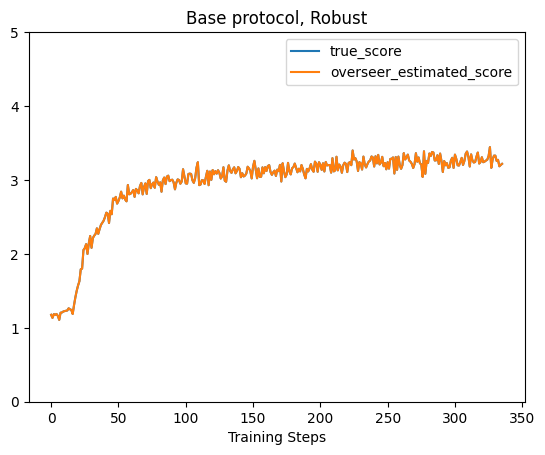

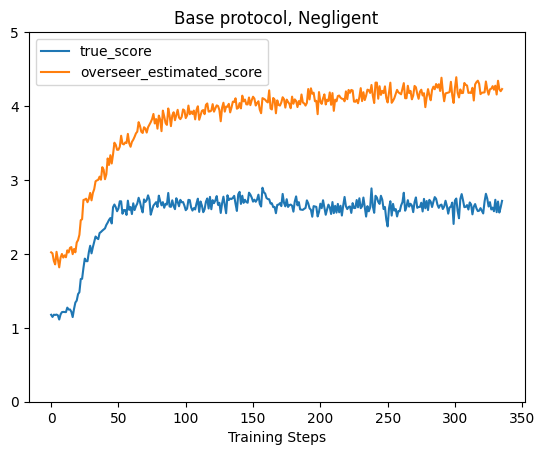

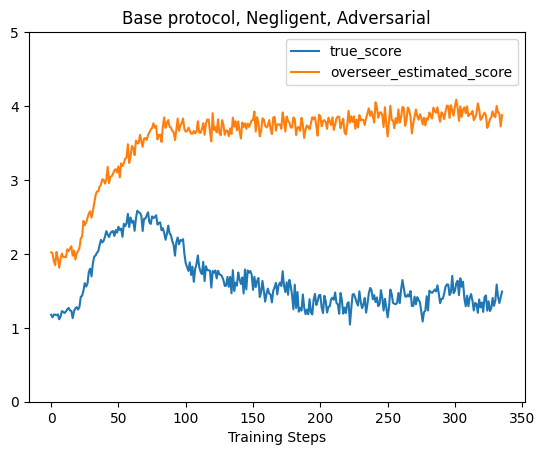

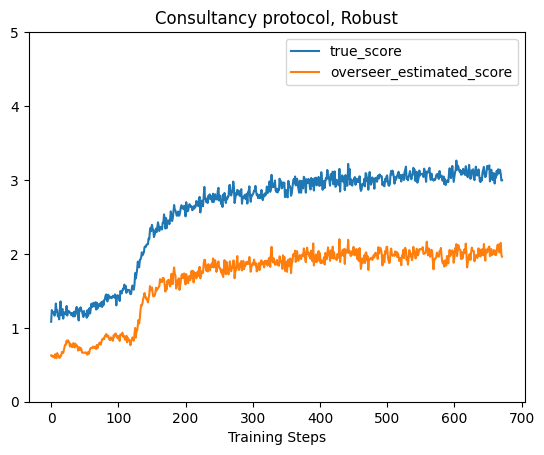

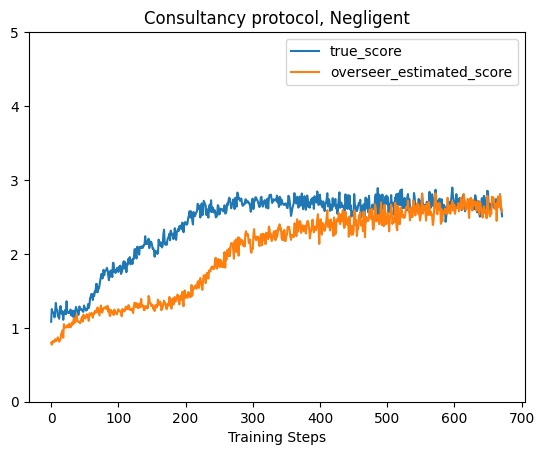

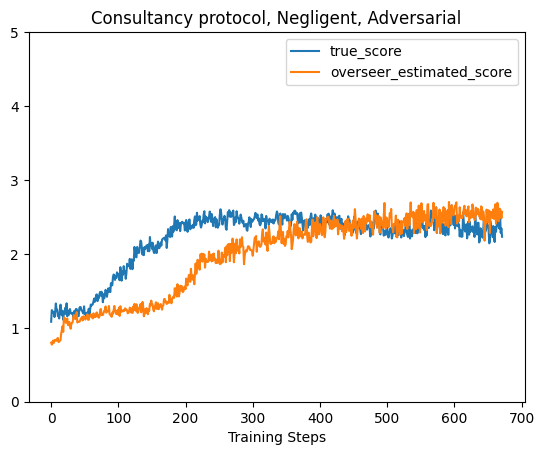

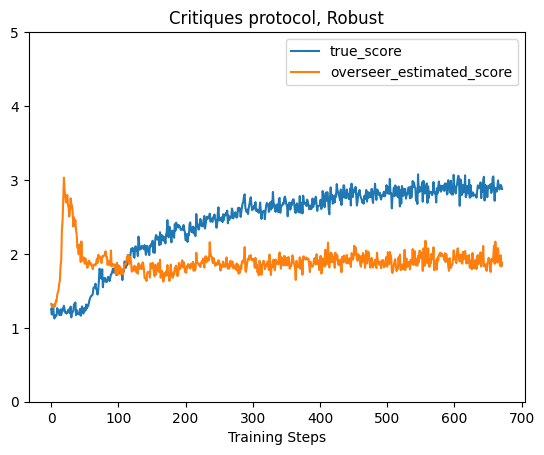

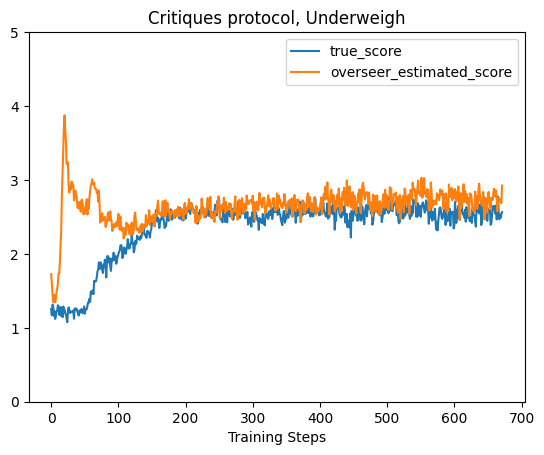

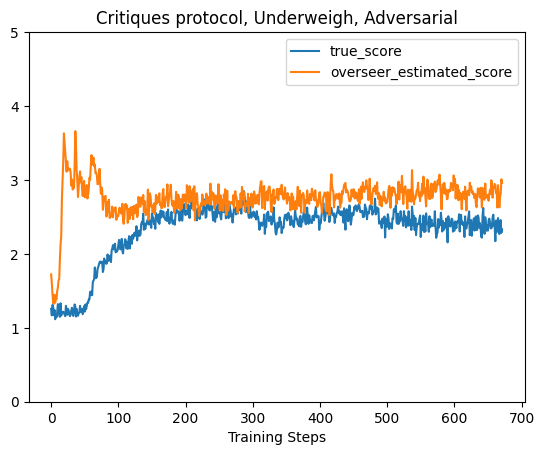

In [28]:
df = pd.read_csv("results/training/negligent-biased-base/robust.csv")
ax = make_train_plot(df, "Base protocol, Robust")
fig = ax.get_figure()
fig.savefig("results/plots/base-robust-training.png")

df = pd.read_csv("results/training/negligent-biased-base/negligent.csv")
ax = make_train_plot(df, "Base protocol, Negligent")
fig = ax.get_figure()
fig.savefig("results/plots/base-negligent-training.png")

df = pd.read_csv("results/training/negligent-biased-base/negligent-adversarial.csv")
ax = make_train_plot(df, "Base protocol, Negligent, Adversarial")
fig = ax.get_figure()
fig.savefig("results/plots/base-negligent-adversarial-training.png")

df = pd.read_csv("results/training/negligent-biased/robust.csv")
ax = make_train_plot(df, "Consultancy protocol, Robust")
fig = ax.get_figure()
fig.savefig("results/plots/consultancy-robust-training.png")

df = pd.read_csv("results/training/negligent-biased/negligent.csv")
ax = make_train_plot(df, "Consultancy protocol, Negligent")
fig = ax.get_figure()
fig.savefig("results/plots/consultancy-negligent-training.png")

df = pd.read_csv("results/training/negligent-biased/negligent-adversarial.csv")
ax = make_train_plot(df, "Consultancy protocol, Negligent, Adversarial")
fig = ax.get_figure()
fig.savefig("results/plots/consultancy-negligent-adversarial-training.png")

df = pd.read_csv("results/training/negligent-biased-judge/robust.csv")
ax = make_train_plot(df, "Critiques protocol, Robust")
fig = ax.get_figure()
fig.savefig("results/plots/critiques-robust-training.png")

df = pd.read_csv("results/training/negligent-biased-judge/underweigh.csv")
ax = make_train_plot(df, "Critiques protocol, Underweigh")
fig = ax.get_figure()
fig.savefig("results/plots/critiques-underweigh-training.png")

df = pd.read_csv("results/training/negligent-biased-judge/underweigh-adversarial.csv")
ax = make_train_plot(df, "Critiques protocol, Underweigh, Adversarial")
fig = ax.get_figure()
fig.savefig("results/plots/critiques-underweigh-adversarial-training.png")